In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/Users/florian/Documents/github/DP2/Energy_production_price_prediction/HEFTcom24/data/features.csv")

In [3]:
df = df.drop(columns=['Unnamed: 0'])   
df = df.dropna()

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["valid_time", "Solar_MWh_credit"]), df["Solar_MWh_credit"], test_size=0.2, random_state=42)

In [19]:
test_indices = X_test.index
valid_time_test = df.loc[test_indices, "valid_time"]

In [21]:
df["valid_time_test"] = np.nan
df.loc[test_indices, "valid_time_test"] = valid_time_test.values

/var/folders/fm/5lbdpfj928d6sqhy_19cp6ww0000gn/T/ipykernel_1781/2924070886.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['2022-07-10 12:00:00+00:00' '2020-10-09 19:00:00+00:00'
 '2022-10-09 11:30:00+00:00' ... '2022-12-03 18:30:00+00:00'
 '2024-05-16 22:30:00+00:00' '2023-09-12 12:00:00+00:00']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[test_indices, "valid_time_test"] = valid_time_test.values


In [6]:
import glob

model_paths = glob.glob('models/*_iter_1.pkl')

In [14]:
import joblib
import matplotlib.pyplot as plt
import pandas as pd
import joblib
import numpy as np
from xgboost import XGBRegressor

# Custom pinball loss function
def custom_pinball_loss(y_true, y_pred):
    """
    Custom pinball loss function for XGBoost. The loss function is defined as:
    L(y_true, y_pred) = alpha * (y_true - y_pred) if y_true >= y_pred else (alpha - 1) * (y_true - y_pred)

    args:   y_true: np.array, the true target values
            y_pred: np.array, the predicted target values
    returns: np.array, the loss value for each sample
    """
    y_true = y_true.get_label() if hasattr(y_true, 'get_label') else y_true
    delta = y_pred - y_true
    grad = np.where(delta >= 0, alpha, alpha-1)
    hess = np.ones_like(y_true)  # Hessian is 1 for pinball loss
    return grad, hess

In [13]:
predictions = {model_path: joblib.load(model_path).predict(X_test) for model_path in model_paths}

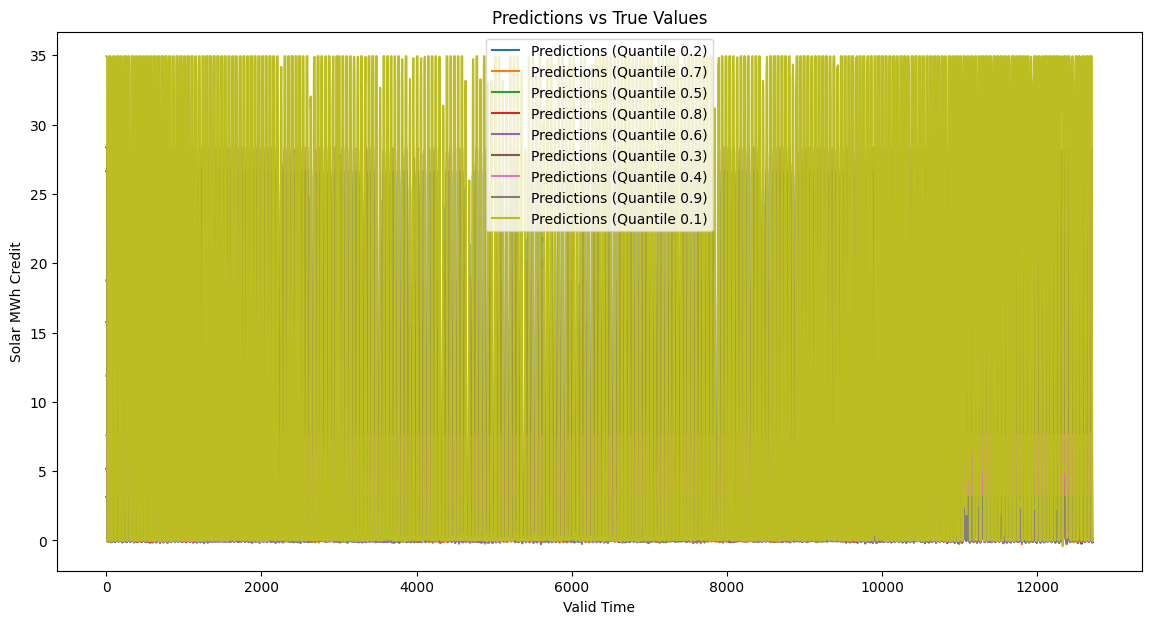

In [25]:
import matplotlib.pyplot as plt

# Ensure valid_time_test is in datetime format
df["valid_time_test"] = pd.to_datetime(df["valid_time_test"])

# Plot y_test
plt.figure(figsize=(14, 7))
# plt.plot(y_test, label='True Values', color='black')

# Plot predictions for each quantile model
for model_path, y_pred in predictions.items():
    quantile = model_path.split('_')[2]
    plt.plot(y_pred, label=f'Predictions (Quantile {quantile})')

plt.xlabel('Valid Time')
plt.ylabel('Solar MWh Credit')
plt.title('Predictions vs True Values')
plt.legend()
plt.show()